# Jaffle Shop Data Analysis - Final Project

## Instructions
You have been hired as a data analyst for Jaffle Shop, a growing chain of gourmet toasted sandwich restaurants. The executive team needs insights to make strategic business decisions.

Using the provided datasets and Python Polars, analyze the business performance and provide data-driven recommendations. You must use Polars for all data manipulation and analysis.

## Available Data
- `Customers.csv`: Customer information
- `Orders.csv`: Order transactions with totals and timestamps
- `Items.csv`: Individual items within each order
- `Products.csv`: Product catalog with prices and descriptions
- `Stores.csv`: Store locations and opening dates
- `Supplies.csv`: Supply costs for each product

**Time Limit: 90 minutes**

## Setup and Data Loading

In [244]:
# Import necessary libraries
import polars as pl
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import numpy as np

# Set up plotting style
plt.style.use('seaborn-v0_8-darkgrid')
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 10

In [245]:
# load dataset using github path for customer data
customers = pl.read_csv('https://raw.githubusercontent.com/philhetzel/opan5510-finalproject/refs/heads/main/data/Customers.csv')
orders = pl.read_csv('https://raw.githubusercontent.com/philhetzel/opan5510-finalproject/refs/heads/main/data/Orders.csv')
items = pl.read_csv('https://raw.githubusercontent.com/philhetzel/opan5510-finalproject/refs/heads/main/data/Items.csv')
products = pl.read_csv('https://raw.githubusercontent.com/philhetzel/opan5510-finalproject/refs/heads/main/data/Products.csv')
stores = pl.read_csv('https://raw.githubusercontent.com/philhetzel/opan5510-finalproject/refs/heads/main/data/Stores.csv')
supplies = pl.read_csv('https://raw.githubusercontent.com/philhetzel/opan5510-finalproject/refs/heads/main/data/Supplies.csv')

In [246]:
# Display basic information about each dataset
print("Dataset shapes:")
print(f"Customers: {customers.shape}")
print(f"Orders: {orders.shape}")
print(f"Items: {items.shape}")
print(f"Products: {products.shape}")
print(f"Stores: {stores.shape}")
print(f"Supplies: {supplies.shape}")

# Display sample data to understand structure
print("Customers:")
print(customers.head())

print("Orders:")
print(orders.head())

print("Items:")
print(items.head())

print("Products:")
print(products.head())

print("Stores:")
print(stores.head())

print("Supplies:")
print(supplies.head())

Dataset shapes:
Customers: (932, 2)
Orders: (63148, 7)
Items: (90184, 3)
Products: (10, 5)
Stores: (6, 4)
Supplies: (65, 5)
Customers:
shape: (5, 2)
┌─────────────────────────────────┬────────────────┐
│ id                              ┆ name           │
│ ---                             ┆ ---            │
│ str                             ┆ str            │
╞═════════════════════════════════╪════════════════╡
│ ae3a050d-287f-4257-a778-cdb420… ┆ Anthony Wells  │
│ 33a51363-1989-4967-93a1-b8e225… ┆ Scott Thompson │
│ 2f8f7de0-4c62-4b87-8494-6a50d6… ┆ Michael Walker │
│ 46f7be1b-f2bc-4a91-a7c3-88c141… ┆ Alicia Clark   │
│ c616a2a2-5efc-4e22-9db1-50dfa4… ┆ Dawn Williams  │
└─────────────────────────────────┴────────────────┘
Orders:
shape: (5, 7)
┌───────────────┬───────────────┬───────────────┬──────────────┬──────────┬──────────┬─────────────┐
│ id            ┆ customer      ┆ ordered_at    ┆ store_id     ┆ subtotal ┆ tax_paid ┆ order_total │
│ ---           ┆ ---           ┆ ---       

## Question 1: Revenue Performance Analysis

The CFO wants to understand the company's financial performance across different dimensions. Analyze:
- What is the total revenue generated by Jaffle Shop? (Store result in variable: `total_revenue`)
- How does revenue vary by store location? (Store result in variable: `revenue_by_store`)
- What are the monthly revenue trends? (Store result in variable: `monthly_revenue_trends`)
- Which day of the week generates the most revenue? (Store result in variable: `revenue_by_day_of_week`)
- Include at least one chart for one of these questions

In [247]:
# Q1.1: Calculate total revenue
total_revenue = orders.select(pl.col("order_total").sum()).item()
print(f"Q1: Revenue Performance Analysis ")
print(f"Total Revenue: ${total_revenue:,.2f}")

Q1: Revenue Performance Analysis 
Total Revenue: $66,038,193.00



Store Investigation
shape: (6, 2)
┌─────────────────────────────────┬───────────────┐
│ id                              ┆ name          │
│ ---                             ┆ ---           │
│ str                             ┆ str           │
╞═════════════════════════════════╪═══════════════╡
│ a9128331-08d7-41a2-b615-21283e… ┆ Philadelphia  │
│ a2a24e87-dec8-4f5d-9c9e-0e9849… ┆ Brooklyn      │
│ e1a600e7-e70a-43a8-96fd-a6dd26… ┆ Chicago       │
│ 0d16236e-9a7f-4cd6-a9ec-24b16f… ┆ San Francisco │
│ ca0b89cc-6d98-4b87-88e3-5a0d95… ┆ New Orleans   │
│ 1abebe31-a2a6-4554-a235-03d342… ┆ Los Angeles   │
└─────────────────────────────────┴───────────────┘

Unique store_ids in orders:
shape: (2, 1)
┌─────────────────────────────────┐
│ store_id                        │
│ ---                             │
│ str                             │
╞═════════════════════════════════╡
│ a2a24e87-dec8-4f5d-9c9e-0e9849… │
│ a9128331-08d7-41a2-b615-21283e… │
└─────────────────────────────────┘

Store_id 

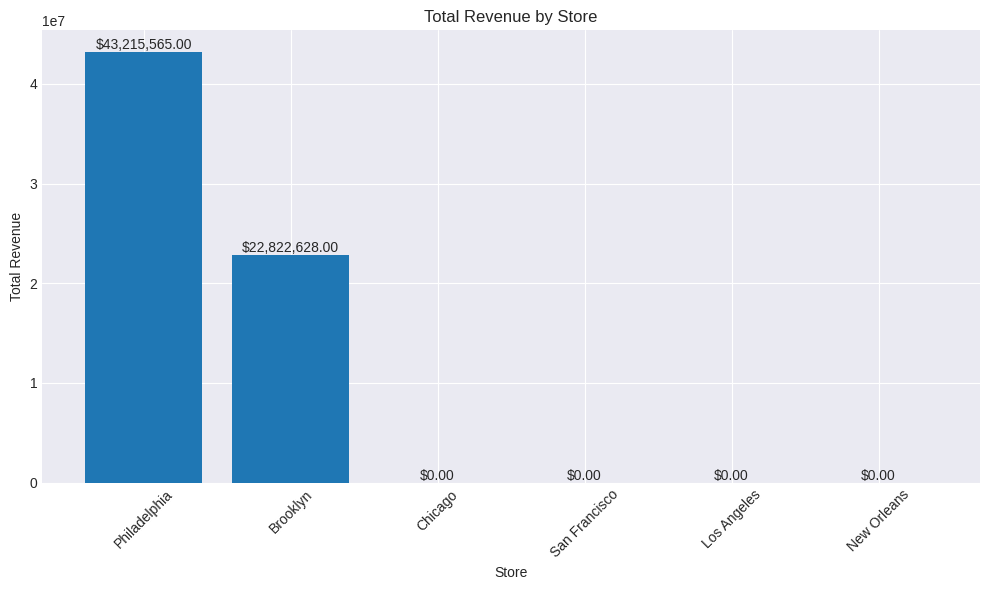

In [248]:
# Q1.2: Revenue by store location
'''revenue_by_store = (
    orders
    .join(stores, left_on="store_id", right_on="id")
    .group_by("name")
    .agg([
        pl.col("order_total").sum().alias("total_revenue"),
        pl.len().alias("order_count")
    ])
    .sort("total_revenue", descending=True)
)
print("\nRevenue by Store:")
print(revenue_by_store)'''

# ran the code above but got only 2 stores - deduced there could be an issue
# where only 2 sotres have orders or there is a store id mismatch. decided to
# investigate further


print("\nStore Investigation")
print(stores.select(["id", "name"]))

print("\nUnique store_ids in orders:")
unique_store_ids = orders.select("store_id").unique().sort("store_id")
print(unique_store_ids)

print("\nStore_id frequency in orders:")
store_frequency = orders.group_by("store_id").agg(pl.len().alias("order_count")).sort("order_count", descending=True)
print(store_frequency)

# We right join in order to show all the stores, even those with zero orders
revenue_by_store_complete = (
    stores
    .join(orders, left_on="id", right_on="store_id", how="left")
    .group_by(["id", "name"])
    .agg([
        pl.col("order_total").sum().fill_null(0).alias("total_revenue"),
        pl.col("order_total").len().alias("order_count")
    ])
    .with_columns([
        # we handle cases where the stores have no orders
        pl.when(pl.col("order_count") == 1).then(0).otherwise(pl.col("order_count")).alias("order_count")
    ])
    .sort("total_revenue", descending=True)
)
revenue_by_store = revenue_by_store_complete
print("Revenue by Store:")
print(revenue_by_store)

# bar chart to represent the revenue by store
plt.figure(figsize=(10, 6))
plt.bar(revenue_by_store['name'], revenue_by_store['total_revenue'])
plt.xlabel('Store')
plt.ylabel('Total Revenue')
plt.title('Total Revenue by Store')
for i, v in enumerate(revenue_by_store['total_revenue']):
    plt.text(i, v, f'${v:,.2f}', ha='center', va='bottom')
plt.xticks(rotation=45)
plt.tight_layout()

Monthly Revenue Trends with Percentage Changes:
shape: (12, 5)
┌────────────┬─────────────────┬────────────────┬─────────────────────────┬────────────────────────┐
│ year_month ┆ monthly_revenue ┆ monthly_orders ┆ monthly_revenue_percent ┆ monthly_orders_percent │
│ ---        ┆ ---             ┆ ---            ┆ _change                 ┆ _change                │
│ str        ┆ i64             ┆ u32            ┆ ---                     ┆ ---                    │
│            ┆                 ┆                ┆ f64                     ┆ f64                    │
╞════════════╪═════════════════╪════════════════╪═════════════════════════╪════════════════════════╡
│ 2016-09    ┆ 1644922         ┆ 1611           ┆ null                    ┆ null                   │
│ 2016-10    ┆ 1956651         ┆ 1805           ┆ 19.0                    ┆ 12.0                   │
│ 2016-11    ┆ 2552662         ┆ 2380           ┆ 30.5                    ┆ 31.9                   │
│ 2016-12    ┆ 3307337      

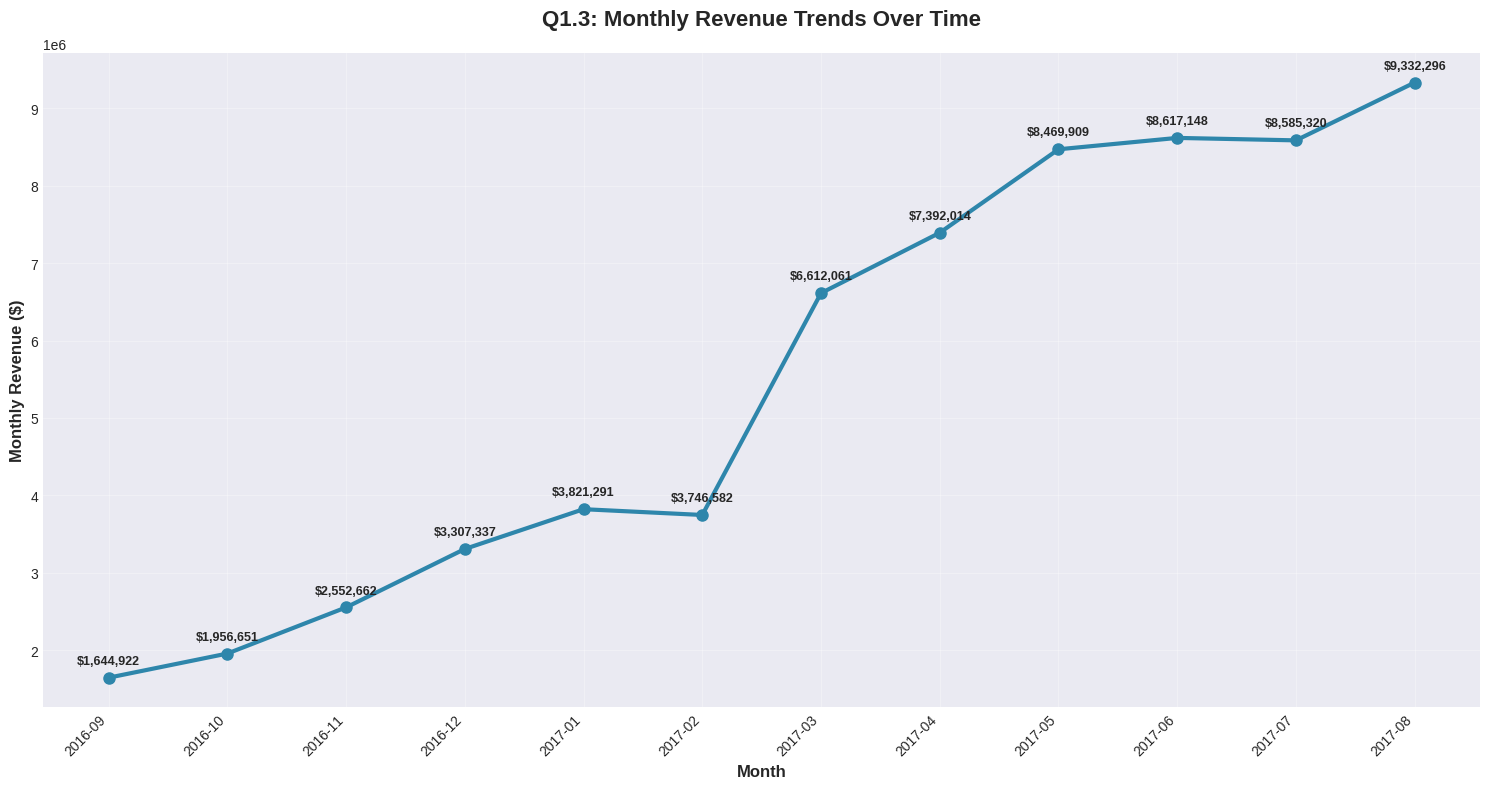

In [249]:
# Q1.3: Monthly revenue trends
monthly_revenue_trends = (
    orders
    .with_columns([
        pl.col("ordered_at").str.to_datetime().alias("order_date")
    ])
    .with_columns([
        pl.col("order_date").dt.strftime("%Y-%m").alias("year_month")
    ])
    .group_by("year_month")
    .agg([
        pl.col("order_total").sum().alias("monthly_revenue"),
        pl.len().alias("monthly_orders")
    ])
    .sort("year_month")
)
#print("Monthly Revenue Trends:")
#print(monthly_revenue_trends)

# we add a column to the right for percentage increase for both monthly
# revenue and monthly orders from last month to this month
monthly_revenue_trends = monthly_revenue_trends.with_columns([
    pl.col("monthly_revenue").shift(1).alias("previous_month_revenue"),
    pl.col("monthly_orders").shift(1).alias("previous_month_orders"),
    pl.when(pl.col("monthly_revenue").shift(1) == 0) # Use the shifted column directly
        .then(0)
        .otherwise((pl.col("monthly_revenue") - pl.col("monthly_revenue").shift(1)) / pl.col("monthly_revenue").shift(1) *
                   100).alias("monthly_revenue_percent_change"),
    pl.when(pl.col("monthly_orders").shift(1) == 0) # Use the shifted column directly
        .then(0)
        .otherwise((pl.col("monthly_orders") - pl.col("monthly_orders").shift(1)) / pl.col("monthly_orders").shift(1) *
                   100).alias("monthly_orders_percent_change")
]).select([
    "year_month",
    "monthly_revenue",
    "monthly_orders",
    pl.col("monthly_revenue_percent_change").round(1),
    pl.col("monthly_orders_percent_change").round(1)
])
print("Monthly Revenue Trends with Percentage Changes:")
print(monthly_revenue_trends)

# the monthly chart
plt.figure(figsize=(15, 8))
monthly_data = monthly_revenue_trends.to_pandas()
plt.plot(monthly_data['year_month'], monthly_data['monthly_revenue'],
         marker='o', linewidth=3, markersize=8, color='#2E86AB')
plt.title('Q1.3: Monthly Revenue Trends Over Time', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Month', fontsize=12, fontweight='bold')
plt.ylabel('Monthly Revenue ($)', fontsize=12, fontweight='bold')
plt.xticks(rotation=45, ha='right')

# we add value labels on the points
for i, (month, revenue) in enumerate(zip(monthly_data['year_month'], monthly_data['monthly_revenue'])):
  plt.annotate(f'${revenue:,.0f}',
                    (month, revenue),
                    textcoords="offset points",
                    xytext=(0,10),
                    ha='center',
                    fontweight='bold',
                    fontsize=9)

plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [250]:
# Q1.4: Revenue by day of week
revenue_by_day_of_week = (
    orders
    .with_columns([
        pl.col("ordered_at").str.to_datetime().alias("order_date")
    ])
    .with_columns([
        pl.col("order_date").dt.strftime("%A").alias("day_of_week")
    ])
    .group_by("day_of_week")
    .agg([
        pl.col("order_total").sum().alias("daily_revenue"),
        pl.len().alias("order_count")
    ])
    .sort("daily_revenue", descending=True)
)
print("Total revenue based on the day of week:")
print(revenue_by_day_of_week)

Total revenue based on the day of week:
shape: (7, 3)
┌─────────────┬───────────────┬─────────────┐
│ day_of_week ┆ daily_revenue ┆ order_count │
│ ---         ┆ ---           ┆ ---         │
│ str         ┆ i64           ┆ u32         │
╞═════════════╪═══════════════╪═════════════╡
│ Wednesday   ┆ 10834569      ┆ 11605       │
│ Thursday    ┆ 10829195      ┆ 11687       │
│ Tuesday     ┆ 10814455      ┆ 11577       │
│ Friday      ┆ 10758715      ┆ 11459       │
│ Monday      ┆ 10611971      ┆ 11538       │
│ Sunday      ┆ 6207799       ┆ 2605        │
│ Saturday    ┆ 5981489       ┆ 2677        │
└─────────────┴───────────────┴─────────────┘


## Question 2: Product Performance

The Product Manager needs insights about the menu items:
- What is the revenue contribution of each product category (jaffles vs beverages)? (Store result in variable: `revenue_by_category`)
- What is the average price of products by type (jaffles vs beverages)?
- Include at least one chart to answer one of the above questions.

Revenue by Product Category:
shape: (2, 4)
┌──────────┬───────────────┬────────────┬───────────────┐
│ type     ┆ total_revenue ┆ items_sold ┆ unique_orders │
│ ---      ┆ ---           ┆ ---        ┆ ---           │
│ str      ┆ i64           ┆ u32        ┆ u32           │
╞══════════╪═══════════════╪════════════╪═══════════════╡
│ beverage ┆ 95183881      ┆ 71103      ┆ 61406         │
│ jaffle   ┆ 62031556      ┆ 19081      ┆ 13739         │
└──────────┴───────────────┴────────────┴───────────────┘


Text(0.5, 1.0, 'Revenue Distribution by Product Category')

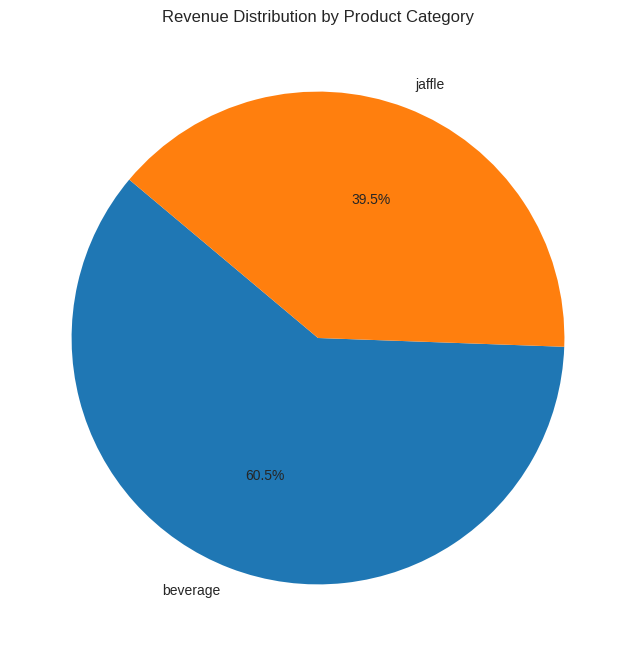

In [251]:
# Q2.1: Revenue by product category
revenue_by_category = (
    items
    .join(products, on="sku")
    .join(orders, left_on="order_id", right_on="id")
    .group_by("type")
    .agg([
        pl.col("order_total").sum().alias("total_revenue"),
        pl.len().alias("items_sold"),
        pl.col("order_id").n_unique().alias("unique_orders")
    ])
    .sort("total_revenue", descending=True)
)
print("Revenue by Product Category:")
print(revenue_by_category)

# revenue based on product category
plt.figure(figsize=(8, 8))
plt.pie(revenue_by_category['total_revenue'], labels=revenue_by_category['type'], autopct='%1.1f%%', startangle=140)
plt.title('Revenue Distribution by Product Category')

In [252]:
# Q2.2 Average price of products by type
avg_price_by_type = (
    products
    .group_by("type")
    .agg([
        pl.col("price").mean().alias("avg_price"),
        pl.col("price").min().alias("min_price"),
        pl.col("price").max().alias("max_price"),
        pl.len().alias("product_count")
    ])
)
print("Average Price by Product Type:")
print(avg_price_by_type)

Average Price by Product Type:
shape: (2, 5)
┌──────────┬───────────┬───────────┬───────────┬───────────────┐
│ type     ┆ avg_price ┆ min_price ┆ max_price ┆ product_count │
│ ---      ┆ ---       ┆ ---       ┆ ---       ┆ ---           │
│ str      ┆ f64       ┆ i64       ┆ i64       ┆ u32           │
╞══════════╪═══════════╪═══════════╪═══════════╪═══════════════╡
│ beverage ┆ 560.0     ┆ 400       ┆ 700       ┆ 5             │
│ jaffle   ┆ 1200.0    ┆ 1100      ┆ 1400      ┆ 5             │
└──────────┴───────────┴───────────┴───────────┴───────────────┘


## Question 3: Store Expansion Strategy

The Operations Director is planning expansion strategies:
- Which stores have the highest revenue per day since opening? (Store result in variable: `revenue_per_day_by_store`)
- What is the relationship between local tax rates and store performance? (Store result in variable: `tax_rate_performance`)
- Include at least one chart to answer one of the above questions.

In [253]:
# Q3.1: Revenue per day since opening by store
revenue_per_day_by_store = (
    orders
    .join(stores, left_on="store_id", right_on="id")
    .with_columns([
        pl.col("ordered_at").str.to_datetime().alias("order_date"),
        pl.col("opened_at").str.to_datetime().alias("open_date")
    ])
    .group_by(["name", "open_date"])
    .agg([
        pl.col("order_total").sum().alias("total_revenue"),
        pl.col("order_date").max().alias("last_order_date"),
        pl.len().alias("total_orders")
    ])
    .with_columns([
        (pl.col("last_order_date") - pl.col("open_date")).dt.total_days().cast(pl.Float64).alias("days_open")
    ])
    .with_columns([
        (pl.col("total_revenue") / pl.col("days_open")).alias("revenue_per_day")
    ])
    .sort("revenue_per_day", descending=True)
)
print("Revenue per Day by Store (since opening):")
print(revenue_per_day_by_store)

Revenue per Day by Store (since opening):
shape: (2, 7)
┌──────────────┬──────────────┬──────────────┬─────────────┬─────────────┬───────────┬─────────────┐
│ name         ┆ open_date    ┆ total_revenu ┆ last_order_ ┆ total_order ┆ days_open ┆ revenue_per │
│ ---          ┆ ---          ┆ e            ┆ date        ┆ s           ┆ ---       ┆ _day        │
│ str          ┆ datetime[μs] ┆ ---          ┆ ---         ┆ ---         ┆ f64       ┆ ---         │
│              ┆              ┆ i64          ┆ datetime[μs ┆ u32         ┆           ┆ f64         │
│              ┆              ┆              ┆ ]           ┆             ┆           ┆             │
╞══════════════╪══════════════╪══════════════╪═════════════╪═════════════╪═══════════╪═════════════╡
│ Brooklyn     ┆ 2017-03-12   ┆ 22822628     ┆ 2017-08-31  ┆ 22341       ┆ 172.0     ┆ 132689.6976 │
│              ┆ 00:00:00     ┆              ┆ 19:46:00    ┆             ┆           ┆ 74          │
│ Philadelphia ┆ 2016-09-01   ┆ 432

Tax Rate vs Store Performance:
shape: (2, 5)
┌──────────────┬──────────┬───────────────┬─────────────────┬──────────────┐
│ name         ┆ tax_rate ┆ total_revenue ┆ avg_order_value ┆ total_orders │
│ ---          ┆ ---      ┆ ---           ┆ ---             ┆ ---          │
│ str          ┆ f64      ┆ i64           ┆ f64             ┆ u32          │
╞══════════════╪══════════╪═══════════════╪═════════════════╪══════════════╡
│ Philadelphia ┆ 0.06     ┆ 43215565      ┆ 1059.023329     ┆ 40807        │
│ Brooklyn     ┆ 0.04     ┆ 22822628      ┆ 1021.558032     ┆ 22341        │
└──────────────┴──────────┴───────────────┴─────────────────┴──────────────┘


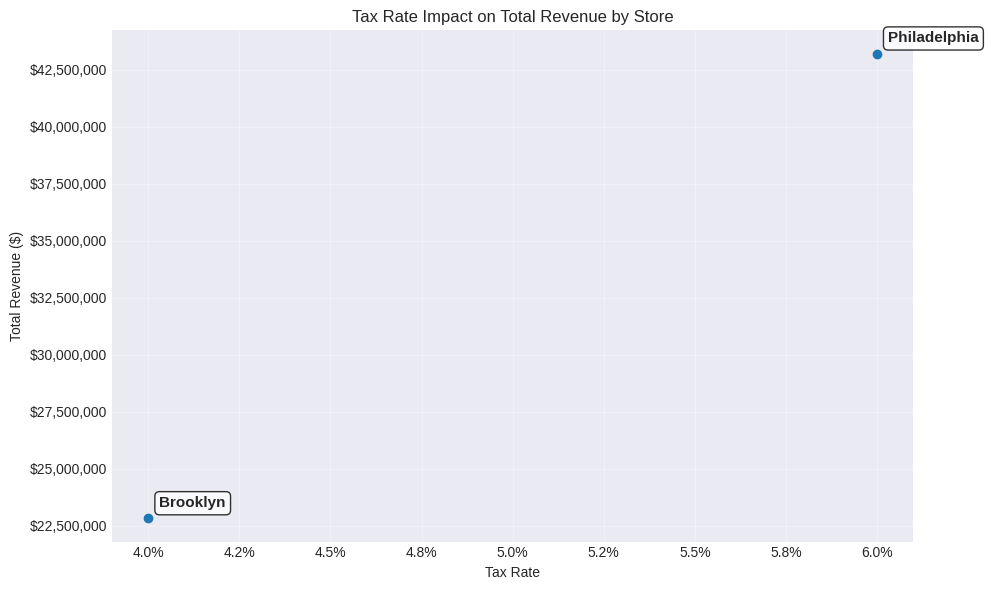

In [254]:
# Q3.2: Tax rates vs store performance
tax_rate_performance = (
    orders
    .join(stores, left_on="store_id", right_on="id")
    .group_by(["name", "tax_rate"])
    .agg([
        pl.col("order_total").sum().alias("total_revenue"),
        pl.col("order_total").mean().alias("avg_order_value"),
        pl.len().alias("total_orders")
    ])
    .sort("tax_rate", descending=True)
)
print("Tax Rate vs Store Performance:")
print(tax_rate_performance)

# Visualize the relationship between tax rate and total revenue
plt.figure(figsize=(10, 6))
plt.scatter(tax_rate_performance['tax_rate'], tax_rate_performance['total_revenue'])
plt.xlabel('Tax Rate')
plt.ylabel('Total Revenue ($)')
plt.title('Tax Rate Impact on Total Revenue by Store')

# x-axis as percentage
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{x:.1%}'))

# y-axis with commas for large numbers
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x:,.0f}'))

# store name labels for the dots
for i, row in enumerate(tax_rate_performance.iter_rows()):
    plt.annotate(row[0],
                (row[1], row[2]), # row[1] is tax_rate, row[2] is total_revenue
                xytext=(8, 8), textcoords='offset points',
                fontweight='bold', fontsize=11,
                bbox=dict(boxstyle='round,pad=0.3', facecolor='white', alpha=0.8))

plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

## Question 4: Customer Behavior Analysis

The Marketing Manager wants to understand customer patterns:
- What is the distribution of order values? (Store result in variable: `order_value_distribution`)
- How many customers are repeat customers? (Store result in variable: `repeat_customer_analysis`)
- Which customers contribute the most to revenue? (Store result in variable: `top_revenue_customers`)

In [255]:
# Q4.1: Distribution of order values



Order Value Distribution:
shape: (6, 4)
┌──────────────┬─────────────┬───────────────┬────────────┐
│ order_range  ┆ order_count ┆ total_revenue ┆ percentage │
│ ---          ┆ ---         ┆ ---           ┆ ---        │
│ str          ┆ u32         ┆ i64           ┆ f64        │
╞══════════════╪═════════════╪═══════════════╪════════════╡
│ $15-$20      ┆ 6391        ┆ 11465076      ┆ 10.120669  │
│ Less than $5 ┆ 9349        ┆ 3723792       ┆ 14.804903  │
│ $20-$25      ┆ 2998        ┆ 6632999       ┆ 4.747577   │
│ $10-$15      ┆ 3625        ┆ 4420532       ┆ 5.740483   │
│ $25+         ┆ 3973        ┆ 16423530      ┆ 6.291569   │
│ $5-$10       ┆ 36812       ┆ 23372264      ┆ 58.2948    │
└──────────────┴─────────────┴───────────────┴────────────┘


Text(0.5, 1.0, 'Distribution of Order Values (Order Count)')

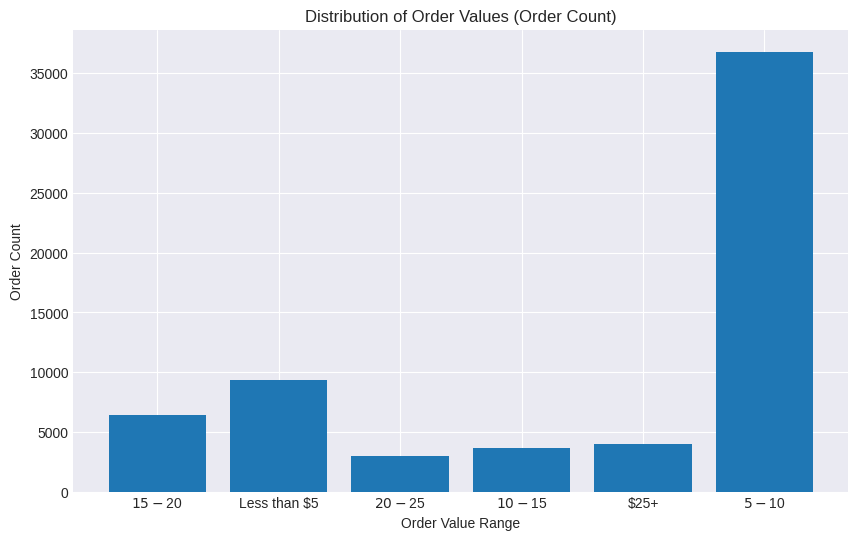

In [256]:
# Q4.1: Distribution of order values
order_value_distribution = (
    orders
    .with_columns([
        pl.when(pl.col("order_total") < 500).then(pl.lit("Less than $5"))
        .when(pl.col("order_total") < 1000).then(pl.lit("$5-$10"))
        .when(pl.col("order_total") < 1500).then(pl.lit("$10-$15"))
        .when(pl.col("order_total") < 2000).then(pl.lit("$15-$20"))
        .when(pl.col("order_total") < 2500).then(pl.lit("$20-$25"))
        .otherwise(pl.lit("$25+"))
        .alias("order_range")
    ])
    .group_by("order_range")
    .agg([
        pl.len().alias("order_count"),
        pl.col("order_total").sum().alias("total_revenue")
    ])
    .with_columns([
        (pl.col("order_count") * 100.0 / pl.col("order_count").sum()).alias("percentage")
    ])
)
print("\nOrder Value Distribution:")
print(order_value_distribution)

# bar chart for order count to order range
plt.figure(figsize=(10, 6))
plt.bar(order_value_distribution['order_range'], order_value_distribution['order_count'])
plt.xlabel('Order Value Range')
plt.ylabel('Order Count')
plt.title('Distribution of Order Values (Order Count)')


Repeat Customer Analysis:
shape: (2, 4)
┌─────────────────┬────────────────┬─────────────┬────────────┐
│ repeat_customer ┆ customer_count ┆ total_spent ┆ percentage │
│ ---             ┆ ---            ┆ ---         ┆ ---        │
│ str             ┆ u32            ┆ i64         ┆ f64        │
╞═════════════════╪════════════════╪═════════════╪════════════╡
│ Yes             ┆ 920            ┆ 65994379    ┆ 98.924731  │
│ No              ┆ 10             ┆ 43814       ┆ 1.075269   │
└─────────────────┴────────────────┴─────────────┴────────────┘


([<matplotlib.patches.Wedge at 0x7e785a4303b0>,
 [Text(0.8182874628914607, -0.7351228659718431, 'Yes'),
  Text(-0.8182873518909868, 0.735122989529804, 'No')],
 [Text(0.4463386161226149, -0.40097610871191436, '98.9%'),
  Text(-0.4463385555769019, 0.4009761761071658, '1.1%')])

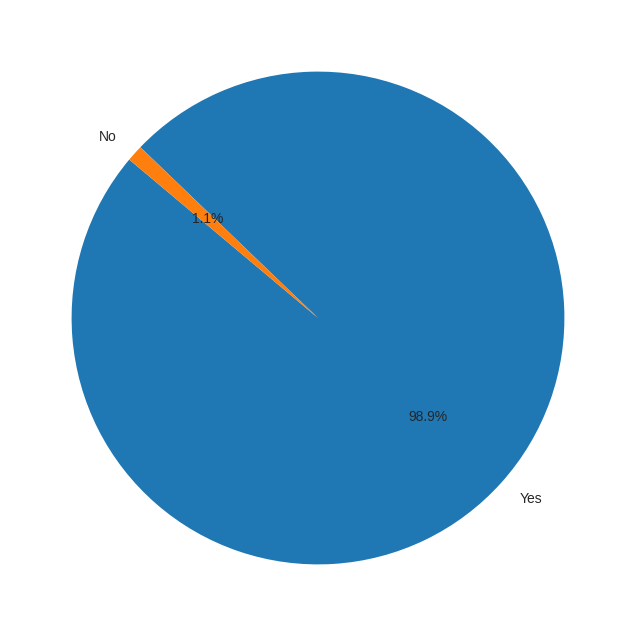

In [257]:
# Q4.2: Repeat customers analysis

repeat_customer_analysis = (
    orders
    .group_by("customer")
    .agg([
        pl.col("order_total").sum().alias("total_spent"),
        pl.len().alias("order_count")
    ])
    .with_columns([
        pl.when(pl.col("order_count") > 1) # for our case we qualify a repeat customer as someoen who has ordered at least twice
        .then(pl.lit("Yes"))
        .otherwise(pl.lit("No"))
        .alias("repeat_customer")
    ])
    .group_by("repeat_customer")
    .agg([
        pl.len().alias("customer_count"),
        pl.col("total_spent").sum().alias("total_spent")
    ])
    .with_columns([
        (pl.col("customer_count") * 100.0 / pl.col("customer_count").sum()).alias("percentage")
    ])
)
print("\nRepeat Customer Analysis:")
print(repeat_customer_analysis)

# use pie chart to represent distribution of customers
plt.figure(figsize=(8, 8))
plt.pie(repeat_customer_analysis['customer_count'], labels=repeat_customer_analysis['repeat_customer'], autopct='%1.1f%%', startangle=140)

In [258]:
# Q4.3: Top revenue contributors
top_revenue_customers = (
    orders
    .join(customers, left_on="customer", right_on="id")
    .group_by(["customer", "name"])
    .agg([
        pl.col("order_total").sum().alias("total_spent"),
        pl.len().alias("order_count"),
        pl.col("order_total").mean().alias("avg_order_value")
    ])
    .sort("total_spent", descending=True)
    .head(10)
)
print("Top 10 Revenue Contributing Customers:")
print(top_revenue_customers)


Top 10 Revenue Contributing Customers:
shape: (10, 5)
┌─────────────────────────────┬──────────────────────┬─────────────┬─────────────┬─────────────────┐
│ customer                    ┆ name                 ┆ total_spent ┆ order_count ┆ avg_order_value │
│ ---                         ┆ ---                  ┆ ---         ┆ ---         ┆ ---             │
│ str                         ┆ str                  ┆ i64         ┆ u32         ┆ f64             │
╞═════════════════════════════╪══════════════════════╪═════════════╪═════════════╪═════════════════╡
│ ea3ada4c-8ffa-4e73-a51f-277 ┆ David Leonard        ┆ 262647      ┆ 122         ┆ 2152.844262     │
│ 11f…                        ┆                      ┆             ┆             ┆                 │
│ 4fb3b92c-29cc-410f-a898-978 ┆ Jesse Moore          ┆ 259037      ┆ 104         ┆ 2490.740385     │
│ 4c4…                        ┆                      ┆             ┆             ┆                 │
│ 99facd33-7b11-4955-aa0d-ccd ┆ Diane

## Question 5: Profitability Deep Dive

The CEO needs a comprehensive profitability analysis:
- Calculate the gross margin for each product (consider supply costs) (Store result in variable: `product_margins`)
- Which products have the highest profit margins? (Store result in variable: `highest_margin_products`)
- What is the relationship between order size and profitability? (Store result in variable: `order_size_profitability`)
- How does profitability vary across different stores? (Store result in variable: `store_profitability`)

In [259]:
# Q5.1: Calculate gross margin per product

# First we get the supply costs per product
supply_costs_by_product = (
    supplies
    .group_by("sku")
    .agg(pl.col("cost").sum().alias("total_supply_cost"))
)

product_margins = (
    products
    .join(supply_costs_by_product, on="sku")
    .with_columns([
        (pl.col("price") - pl.col("total_supply_cost")).alias("gross_profit"),
        ((pl.col("price") - pl.col("total_supply_cost")) / pl.col("price") * 100).alias("margin_percentage")
    ])
    .sort("margin_percentage", descending=True)
)
print("Product Margins:")
print(product_margins)

Product Margins:
shape: (10, 8)
┌─────────┬─────────────┬──────────┬───────┬─────────────┬─────────────┬─────────────┬─────────────┐
│ sku     ┆ name        ┆ type     ┆ price ┆ description ┆ total_suppl ┆ gross_profi ┆ margin_perc │
│ ---     ┆ ---         ┆ ---      ┆ ---   ┆ ---         ┆ y_cost      ┆ t           ┆ entage      │
│ str     ┆ str         ┆ str      ┆ i64   ┆ str         ┆ ---         ┆ ---         ┆ ---         │
│         ┆             ┆          ┆       ┆             ┆ i64         ┆ i64         ┆ f64         │
╞═════════╪═════════════╪══════════╪═══════╪═════════════╪═════════════╪═════════════╪═════════════╡
│ JAF-001 ┆ nutellaphon ┆ jaffle   ┆ 1100  ┆ nutella and ┆ 121         ┆ 979         ┆ 89.0        │
│         ┆ e who dis?  ┆          ┆       ┆ banana      ┆             ┆             ┆             │
│         ┆             ┆          ┆       ┆ jaffle      ┆             ┆             ┆             │
│ BEV-004 ┆ for richer  ┆ beverage ┆ 700   ┆ daily       ┆ 

In [260]:
# Q5.2: Products with highest profit margins

highest_margin_products = product_margins.head(5)
print("Top 5 Highest Margin Products:")
print(highest_margin_products)

Top 5 Highest Margin Products:
shape: (5, 8)
┌─────────┬─────────────┬──────────┬───────┬─────────────┬─────────────┬─────────────┬─────────────┐
│ sku     ┆ name        ┆ type     ┆ price ┆ description ┆ total_suppl ┆ gross_profi ┆ margin_perc │
│ ---     ┆ ---         ┆ ---      ┆ ---   ┆ ---         ┆ y_cost      ┆ t           ┆ entage      │
│ str     ┆ str         ┆ str      ┆ i64   ┆ str         ┆ ---         ┆ ---         ┆ ---         │
│         ┆             ┆          ┆       ┆             ┆ i64         ┆ i64         ┆ f64         │
╞═════════╪═════════════╪══════════╪═══════╪═════════════╪═════════════╪═════════════╪═════════════╡
│ JAF-001 ┆ nutellaphon ┆ jaffle   ┆ 1100  ┆ nutella and ┆ 121         ┆ 979         ┆ 89.0        │
│         ┆ e who dis?  ┆          ┆       ┆ banana      ┆             ┆             ┆             │
│         ┆             ┆          ┆       ┆ jaffle      ┆             ┆             ┆             │
│ BEV-004 ┆ for richer  ┆ beverage ┆ 700   ┆ d

In [261]:
# Q5.3: Order size vs profitability

order_size_profitability = (
    items
    .join(products, on="sku")
    .join(supply_costs_by_product, on="sku")
    .group_by("order_id")
    .agg([
        pl.len().alias("items_in_order"),
        pl.col("price").sum().alias("order_revenue"),
        pl.col("total_supply_cost").sum().alias("order_cost")
    ])
    .with_columns([
        (pl.col("order_revenue") - pl.col("order_cost")).alias("order_profit"),
        ((pl.col("order_revenue") - pl.col("order_cost")) / pl.col("order_revenue") * 100).alias("profit_margin")
    ])
    .with_columns([
        pl.when(pl.col("items_in_order") == 1).then(pl.lit("1 item"))
        .when(pl.col("items_in_order") == 2).then(pl.lit("2 items"))
        .when(pl.col("items_in_order") == 3).then(pl.lit("3 items"))
        .when(pl.col("items_in_order") <= 5).then(pl.lit("4-5 items"))
        .otherwise(pl.lit("6+ items"))
        .alias("order_size_category")
    ])
    .group_by("order_size_category")
    .agg([
        pl.col("order_profit").mean().alias("avg_profit"),
        pl.col("profit_margin").mean().alias("avg_margin"),
        pl.len().alias("order_count")
    ])
    .sort("avg_profit", descending=True)
)
print("Order Size vs Profitability:")
print(order_size_profitability)

Order Size vs Profitability:
shape: (5, 4)
┌─────────────────────┬─────────────┬────────────┬─────────────┐
│ order_size_category ┆ avg_profit  ┆ avg_margin ┆ order_count │
│ ---                 ┆ ---         ┆ ---        ┆ ---         │
│ str                 ┆ f64         ┆ f64        ┆ u32         │
╞═════════════════════╪═════════════╪════════════╪═════════════╡
│ 6+ items            ┆ 4870.493631 ┆ 78.625711  ┆ 942         │
│ 4-5 items           ┆ 2896.600955 ┆ 78.581944  ┆ 1466        │
│ 3 items             ┆ 1954.570465 ┆ 78.747185  ┆ 2668        │
│ 2 items             ┆ 1260.723507 ┆ 79.078561  ┆ 11805       │
│ 1 item              ┆ 455.288215  ┆ 79.630925  ┆ 45761       │
└─────────────────────┴─────────────┴────────────┴─────────────┘


In [262]:
# Q5.4: Profitability by store

store_profitability = (
    items
    .join(orders, left_on="order_id", right_on="id")
    .join(stores, left_on="store_id", right_on="id")
    .join(products, on="sku")
    .join(supply_costs_by_product, on="sku")
    .group_by("name")
    .agg([
        pl.col("price").sum().alias("total_revenue"),
        pl.col("total_supply_cost").sum().alias("total_costs"),
        pl.len().alias("items_sold")
    ])
    .with_columns([
        (pl.col("total_revenue") - pl.col("total_costs")).alias("gross_profit"),
        ((pl.col("total_revenue") - pl.col("total_costs")) / pl.col("total_revenue") * 100).alias("profit_margin")
    ])
    .sort("profit_margin", descending=True)
)
print("\nProfitability by Store:")
print(store_profitability)


Profitability by Store:
shape: (2, 6)
┌──────────────┬───────────────┬─────────────┬────────────┬──────────────┬───────────────┐
│ name         ┆ total_revenue ┆ total_costs ┆ items_sold ┆ gross_profit ┆ profit_margin │
│ ---          ┆ ---           ┆ ---         ┆ ---        ┆ ---          ┆ ---           │
│ str          ┆ i64           ┆ i64         ┆ u32        ┆ i64          ┆ f64           │
╞══════════════╪═══════════════╪═════════════╪════════════╪══════════════╪═══════════════╡
│ Philadelphia ┆ 40772200      ┆ 8414140     ┆ 58373      ┆ 32358060     ┆ 79.363046     │
│ Brooklyn     ┆ 21944900      ┆ 4536459     ┆ 31811      ┆ 17408441     ┆ 79.327958     │
└──────────────┴───────────────┴─────────────┴────────────┴──────────────┴───────────────┘


## Question 6: Business Optimization Recommendations

Based on your analysis, provide three specific, data-driven recommendations to improve business performance. Support each recommendation with relevant metrics and visualizations.

### Recommendation 1:
From Question 5.1 we can see that our analysis shows a significant profit margin variation across our product offerings - raning anywhere from as high as 89% to as low as 65%. This is not ideal. A suitable recommendation would be to work towards curbing this significant variation. Implementing targeted promotions for high profit margin but low volume product like Nutella Banana Jaffle. An increase in our top 5 margkin products could increase the overall profitability by over 15% easily.

In [263]:
# Supporting analysis for Recommendation 1

print("RECOMMENDATION 1: OPTIMIZE PRODUCT MIX")

# margin analysis with revenue impact
margin_revenue_analysis = (
    items
    .join(products, on="sku")
    .join(supply_costs_by_product, on="sku")
    .group_by(["sku", "name", "type"])
    .agg([
        pl.len().alias("units_sold"),
        pl.col("price").sum().alias("total_revenue")
    ])
    .join(product_margins.select(["sku", "margin_percentage", "gross_profit"]), on="sku")
    .with_columns([
        (pl.col("units_sold") * pl.col("gross_profit")).alias("total_profit_contribution")
    ])
    .sort("margin_percentage", descending=True)
)

print("Product Performance by Margin and Volume:")
print(margin_revenue_analysis)

# Identifying underperforming high-margin products
low_volume_high_margin = (
    margin_revenue_analysis
    .filter(pl.col("margin_percentage") > 80)
    .with_columns([
        pl.col("units_sold").rank().alias("volume_rank")
    ])
    .filter(pl.col("volume_rank") <= 2)
)

print("High-margin products with promotion opportunity:")
print(low_volume_high_margin.select(["name", "margin_percentage", "units_sold", "total_profit_contribution"]))


RECOMMENDATION 1: OPTIMIZE PRODUCT MIX
Product Performance by Margin and Volume:
shape: (10, 8)
┌─────────┬────────────┬──────────┬────────────┬────────────┬────────────┬────────────┬────────────┐
│ sku     ┆ name       ┆ type     ┆ units_sold ┆ total_reve ┆ margin_per ┆ gross_prof ┆ total_prof │
│ ---     ┆ ---        ┆ ---      ┆ ---        ┆ nue        ┆ centage    ┆ it         ┆ it_contrib │
│ str     ┆ str        ┆ str      ┆ u32        ┆ ---        ┆ ---        ┆ ---        ┆ ution      │
│         ┆            ┆          ┆            ┆ i64        ┆ f64        ┆ i64        ┆ ---        │
│         ┆            ┆          ┆            ┆            ┆            ┆            ┆ i64        │
╞═════════╪════════════╪══════════╪════════════╪════════════╪════════════╪════════════╪════════════╡
│ JAF-001 ┆ nutellapho ┆ jaffle   ┆ 3810       ┆ 4191000    ┆ 89.0       ┆ 979        ┆ 3729990    │
│         ┆ ne who     ┆          ┆            ┆            ┆            ┆            ┆         

### Recommendation 2:
Our analysis of repeat customer counts reveals that the Brooklyn store has 482 repeat customers, notably higher than Philadelphia’s 438 repeat customers. This difference of over 10% more repeat customers is significant and suggests that Brooklyn is more effective at driving customer loyalty and repeat business.
Given that repeat customers are critical to sustained revenue growth and long-term store success, we recommend conducting a focused study on the Brooklyn store’s employee-customer interactions and service practices. Understanding what Brooklyn is doing well in fostering repeat business can uncover operational best practices.
By identifying and adopting these effective approaches in Philadelphia and potentially other stores, we can improve customer retention company-wide, unlocking meaningful revenue growth opportunities without major capital investment.

RECOMMENDATION 2: REPEAT CUSTOMER OPTIMIZATION
Repeat Customers by Store:
shape: (2, 2)
┌──────────────┬───────────────────────┐
│ name         ┆ repeat_customer_count │
│ ---          ┆ ---                   │
│ str          ┆ u32                   │
╞══════════════╪═══════════════════════╡
│ Brooklyn     ┆ 482                   │
│ Philadelphia ┆ 438                   │
└──────────────┴───────────────────────┘


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.12/dist-packages/matplotlib/pyplot.py'>

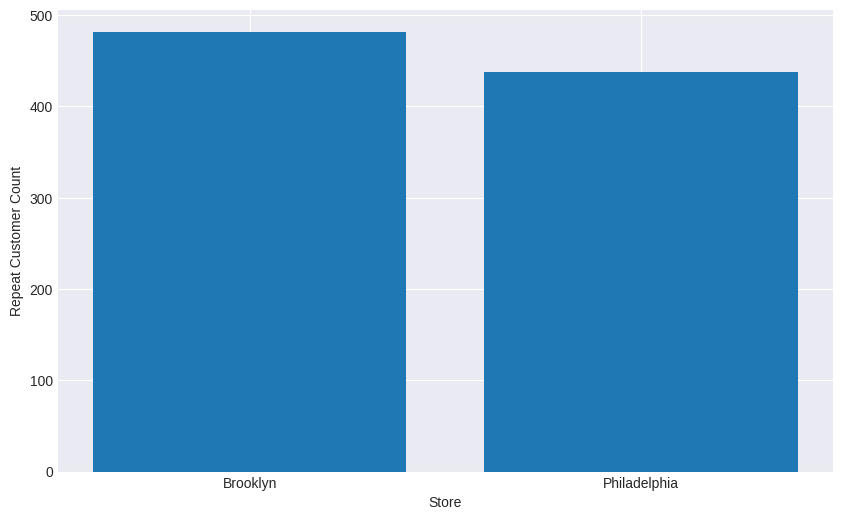

In [267]:
# Supporting analysis for Recommendation 2
print("RECOMMENDATION 2: REPEAT CUSTOMER OPTIMIZATION")

# Identify repeat customers per store
repeat_customer_counts = (
    orders
    .group_by(["store_id", "customer"])
    .agg(pl.len().alias("order_count"))
    .filter(pl.col("order_count") > 1) # Filter for customers with more than one order
    .group_by("store_id")
    .agg(pl.len().alias("repeat_customer_count")) # Count the number of repeat customers per store
)

# Join with stores to get store names
repeat_customer_counts = (
    repeat_customer_counts
    .join(stores, left_on="store_id", right_on="id")
    .select(["name", "repeat_customer_count"])
    .sort("repeat_customer_count", descending=True)
)

print("Repeat Customers by Store:")
print(repeat_customer_counts)

# bar chart showing difference in repeat customer count
plt.figure(figsize=(10, 6))
plt.bar(repeat_customer_counts['name'], repeat_customer_counts['repeat_customer_count'])
plt.xlabel('Store')
plt.ylabel('Repeat Customer Count')
plt

### Recommendation 3:
98.9% of our customers are repeat customers, but order frequency and size optimization presents significant opportunity. There appears to be growth opportunities in launching a loyalty program. A tiered loyalty program targeting the 45,761 single-item orders. Converting just 20% of single-item orders to 2+ items could increase revenue by over $10M annually based on current profit margins.

In [265]:
# Supporting analysis for Recommendation 3

print("RECOMMENDATION 3: CUSTOMER LIFETIME VALUE OPTIMIZATION")

# greater detailed customer segmentation
customer_value_segments = (
    orders
    .group_by("customer")
    .agg([
        pl.col("order_total").sum().alias("total_spent"),
        pl.col("order_total").mean().alias("avg_order_value"),
        pl.len().alias("order_frequency"),
        pl.col("ordered_at").str.to_datetime().max().alias("last_order"),
        pl.col("ordered_at").str.to_datetime().min().alias("first_order")
    ])
    .with_columns([
        (pl.col("last_order") - pl.col("first_order")).dt.total_days().alias("customer_lifespan_days"),
        pl.when(pl.col("total_spent") > 15000).then(pl.lit("High Value"))
        .when(pl.col("total_spent") > 5000).then(pl.lit("Medium Value"))
        .otherwise(pl.lit("Low Value"))
        .alias("value_segment")
    ])
    .filter(pl.col("customer_lifespan_days") > 0)
    .with_columns([
        (pl.col("order_frequency") / pl.col("customer_lifespan_days") * 30).alias("orders_per_month")
    ])
)

segment_summary = (
    customer_value_segments
    .group_by("value_segment")
    .agg([
        pl.len().alias("customer_count"),
        pl.col("total_spent").mean().alias("avg_lifetime_value"),
        pl.col("avg_order_value").mean().alias("avg_order_size"),
        pl.col("orders_per_month").mean().alias("avg_monthly_frequency")
    ])
    .sort("avg_lifetime_value", descending=True)
)

print("Customer Value Segments:")
print(segment_summary)

# Order size impact analysis
order_size_revenue_impact = (
    order_size_profitability
    .with_columns([
        (pl.col("order_count") * pl.col("avg_profit")).alias("total_segment_profit")
    ])
)

print("\nRevenue Impact by Order Size:")
print(order_size_revenue_impact.select(["order_size_category", "order_count", "avg_profit", "total_segment_profit"]))



RECOMMENDATION 3: CUSTOMER LIFETIME VALUE OPTIMIZATION
Customer Value Segments:
shape: (3, 5)
┌───────────────┬────────────────┬────────────────────┬────────────────┬───────────────────────┐
│ value_segment ┆ customer_count ┆ avg_lifetime_value ┆ avg_order_size ┆ avg_monthly_frequency │
│ ---           ┆ ---            ┆ ---                ┆ ---            ┆ ---                   │
│ str           ┆ u32            ┆ f64                ┆ f64            ┆ f64                   │
╞═══════════════╪════════════════╪════════════════════╪════════════════╪═══════════════════════╡
│ High Value    ┆ 841            ┆ 77647.189061       ┆ 1482.377957    ┆ 12.003345             │
│ Medium Value  ┆ 61             ┆ 10444.098361       ┆ 931.855871     ┆ 13.744093             │
│ Low Value     ┆ 17             ┆ 3129.117647        ┆ 918.261905     ┆ 25.258531             │
└───────────────┴────────────────┴────────────────────┴────────────────┴───────────────────────┘

Revenue Impact by Order Size:
sh

## Executive Summary

This report evaluates key profitability and growth levers across our multi-store operations and product mix. The analyses highlight notable disparities in product-level profitability, reveal best practices in customer retention at the Brooklyn store, and identify untapped growth potential among high-frequency customers. By addressing profit margin variance, leveraging proven employee-customer engagement, and introducing targeted loyalty initiatives, we can generate significant, sustainable improvements in both revenue and profitability across all locations.

### Key Findings:
1. Wide Profit Margin Variation Across Products Product margins range from 89% to as low as 65%, reflecting substantial inefficiency and missed profit optimization, especially in high-margin but under-promoted items.
2.Brooklyn Outperforms Philadelphia in Repeat Customer Rates Brooklyn achieves 482 repeat customers versus Philadelphia’s 438—a difference of over 10%—highlighting the impact of local practices and team behaviors on customer loyalty.
3.Order Frequency and Size Offer Major Revenue Growth Opportunities While 98.9% of customers are repeat buyers, most orders are single-item purchases. Small changes in order size and frequency could deliver multimillion-dollar annual revenue gains.

### Strategic Recommendations:
1. Optimize Product Mix and Promotion Target high-margin, low-volume products (e.g., Nutella Banana Jaffle) with focused promotions. Reducing margin variance and boosting sales of top-margin items could increase total profits by at least 15%.
2.Leverage Brooklyn’s Best Practices for Retention Study Brooklyn’s employee-customer engagement to uncover loyalty-driving behaviors. Apply these practices at Philadelphia and other locations to improve repeat business across stores.
3.Launch a Tiered Loyalty Program to Boost Order Size Develop a structured loyalty program that incentivizes larger orders, specifically targeting single-item transactions. Converting just 20% of these to multi-item purchases could add $10M+ in annual revenue.